In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [62]:
csv_file = "../dataset/training_set_pixel_size_and_HC.csv"

df = pd.read_csv(csv_file)

print(f"Dataset size: {len(df)} samples")
df.head()


Dataset size: 999 samples


,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel size(mm),999.0,0.139846,0.053005,0.049415,0.108801,0.128357,0.157678,0.39328
head circumference (mm),999.0,174.383093,65.282061,44.300000,153.600000,174.060000,189.825000,346.40000


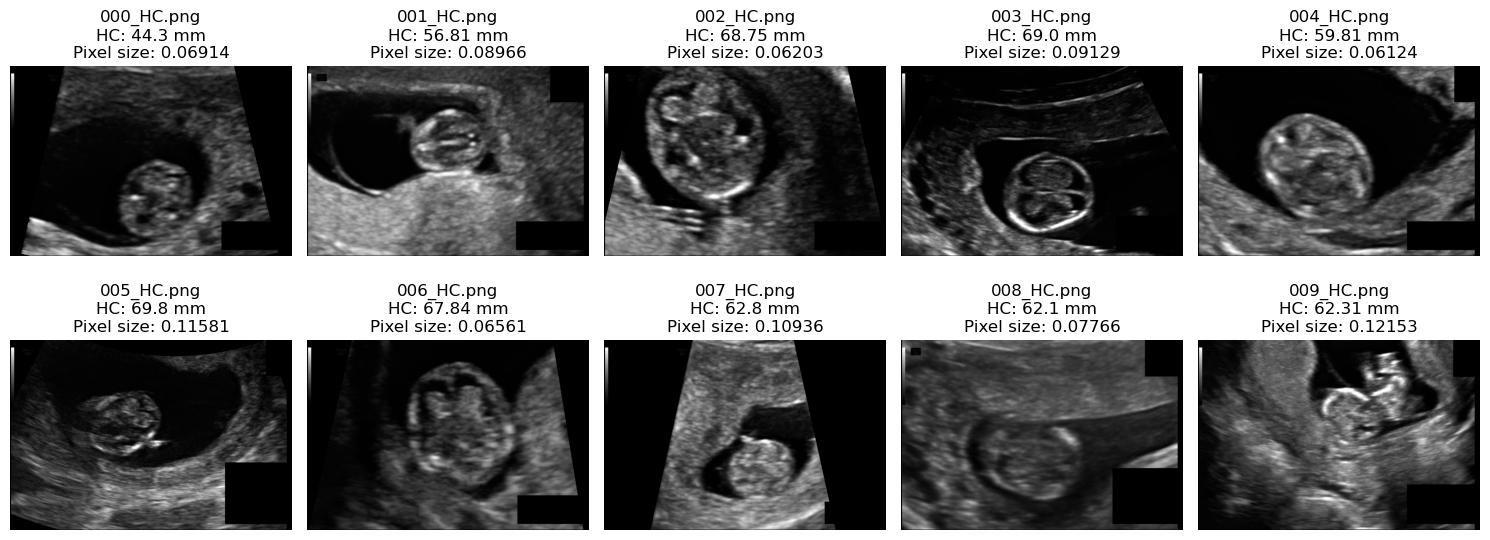

In [64]:
dataset_path = "../dataset/training_set"

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(dataset_path, df.iloc[i]['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)    
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{df.iloc[i]['filename']}\nHC: {df.iloc[i]['head circumference (mm)']} mm\nPixel size: {df.iloc[i]['pixel size(mm)']:.5f}")
    ax.axis("off")
plt.tight_layout()
plt.show()

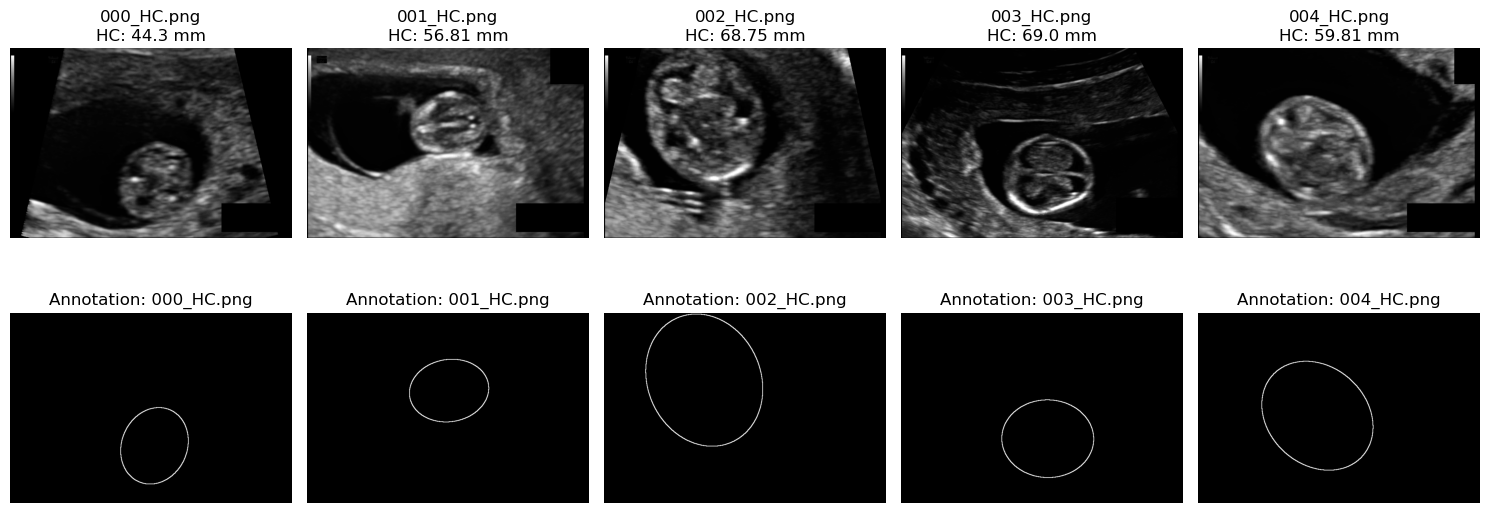

In [65]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):  
    if i >= len(df):
        break  

    img_path = os.path.join(dataset_path, df.iloc[i]['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    annotation_path = img_path.replace(".png", "_Annotation.png")
    annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)

    axes[0, i].imshow(img, cmap="gray")
    axes[0, i].set_title(f"{df.iloc[i]['filename']}\nHC: {df.iloc[i]['head circumference (mm)']} mm")
    axes[0, i].axis("off")

    axes[1, i].imshow(annotation, cmap="gray")
    axes[1, i].set_title(f"Annotation: {df.iloc[i]['filename']}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

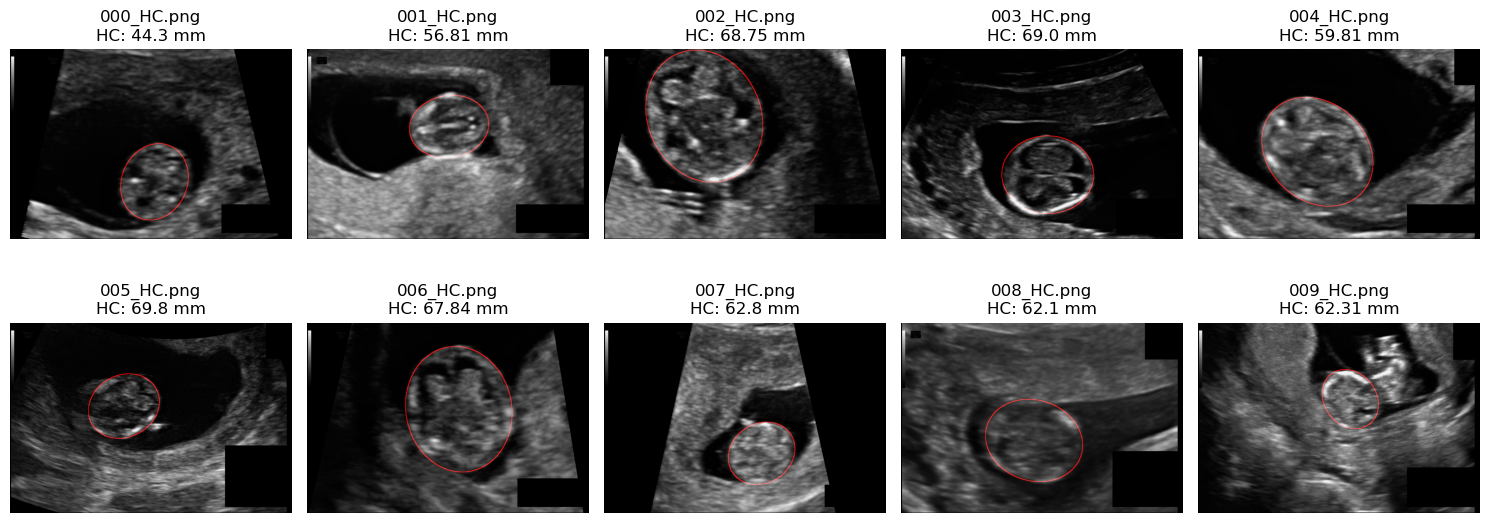

In [71]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(dataset_path, df.iloc[i]['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    annotation_path = img_path.replace(".png", "_Annotation.png")
    annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)
    
    annotation_colored = cv2.cvtColor(annotation, cv2.COLOR_GRAY2BGR)
    annotation_colored[annotation > 0] = [255, 0, 0]
    
    overlay = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), 1, annotation_colored, 1, 0)
    ax.imshow(overlay, cmap='gray')
    ax.set_title(f"{df.iloc[i]['filename']}\nHC: {df.iloc[i]['head circumference (mm)']} mm")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [67]:
image_properties = []

for filename in df['filename']:
    img_path = os.path.join(dataset_path, filename)
    img = cv2.imread(img_path)
    
    if img is not None:
        height, width, channels = img.shape
        file_format = filename.split(".")[-1]
        
        image_properties.append({
            "File name": filename,
            "Height": height,
            "Width": width,
            "Channel": channels,
            "Format": file_format
        })
        
df_properties = pd.DataFrame(image_properties)
df_properties

,File name,Height,Width,Channel,Format
0,000_HC.png,540,800,3,png
1,001_HC.png,540,800,3,png
2,002_HC.png,540,800,3,png
3,003_HC.png,540,800,3,png
4,004_HC.png,540,800,3,png
...,...,...,...,...,...
994,801_HC.png,540,800,3,png
995,802_HC.png,540,800,3,png
996,803_HC.png,540,800,3,png
997,804_HC.png,540,800,3,png
